In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["font.size"] = "26"
#plt.rcParams['savefig.facecolor'] = "0.5"
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

In [2]:
bColor = "red"
oColor = "green"
hColor = "blue"

In [3]:
result = pd.read_csv(r"Substitution/book_vary_m.csv")

In [4]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Blom_runtime,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored
0,book=8_ballot=1000bs=4,8,1000,4,2002,20,20,2,2,0.000443,...,0.445470,1,1,0,2,85,99,86,96,1
1,book=8_ballot=1000bs=4,8,1000,4,2001,6,6,2,2,0.000364,...,0.536586,1,1,0,1,98,99,99,74,1
2,book=8_ballot=1000bs=4,8,1000,4,1991,6,6,2,2,0.001112,...,0.486327,1,1,0,1,90,91,91,66,1
3,book=8_ballot=1000bs=4,8,1000,4,1999,13,13,7,7,0.000852,...,3.448748,1,1,0,11,434,602,435,557,1
4,book=8_ballot=1000bs=4,8,1000,4,2000,32,32,10,10,0.000428,...,2.276049,1,1,0,6,261,303,304,224,2
5,book=8_ballot=100bs=4,8,100,4,2002,5,5,2,2,0.000093,...,0.883276,1,1,0,3,119,126,120,118,1
6,book=8_ballot=100bs=4,8,100,4,1991,5,5,2,2,0.000170,...,2.087092,1,1,0,94,250,572,251,466,1
7,book=8_ballot=100bs=4,8,100,4,1999,7,7,3,3,0.000214,...,1.320700,1,1,0,1,189,202,190,200,1
8,book=8_ballot=100bs=4,8,100,4,2000,2,2,1,1,0.000130,...,0.929943,1,1,0,1,120,140,121,120,1
9,book=8_ballot=1500bs=4,8,1500,4,2002,12,12,6,6,0.000644,...,0.794274,1,1,0,3,93,100,94,93,1


In [5]:
result['margin_difference'] = result['heuristicV1_margin'] - result['Blom_margin']

In [6]:
result

,Dataset,Number_Of_Candidates,Number_of_voters,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,book=8_ballot=1000bs=4,8,1000,4,2002,20,20,2,2,0.000443,...,1,1,0,2,85,99,86,96,1,18
1,book=8_ballot=1000bs=4,8,1000,4,2001,6,6,2,2,0.000364,...,1,1,0,1,98,99,99,74,1,4
2,book=8_ballot=1000bs=4,8,1000,4,1991,6,6,2,2,0.001112,...,1,1,0,1,90,91,91,66,1,4
3,book=8_ballot=1000bs=4,8,1000,4,1999,13,13,7,7,0.000852,...,1,1,0,11,434,602,435,557,1,6
4,book=8_ballot=1000bs=4,8,1000,4,2000,32,32,10,10,0.000428,...,1,1,0,6,261,303,304,224,2,22
5,book=8_ballot=100bs=4,8,100,4,2002,5,5,2,2,0.000093,...,1,1,0,3,119,126,120,118,1,3
6,book=8_ballot=100bs=4,8,100,4,1991,5,5,2,2,0.000170,...,1,1,0,94,250,572,251,466,1,3
7,book=8_ballot=100bs=4,8,100,4,1999,7,7,3,3,0.000214,...,1,1,0,1,189,202,190,200,1,4
8,book=8_ballot=100bs=4,8,100,4,2000,2,2,1,1,0.000130,...,1,1,0,1,120,140,121,120,1,1
9,book=8_ballot=1500bs=4,8,1500,4,2002,12,12,6,6,0.000644,...,1,1,0,3,93,100,94,93,1,6


In [7]:
result.columns

Index(['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'],
      dtype='object')

In [8]:
avg = result.groupby(['Number_of_voters'])['Dataset', 'Number_Of_Candidates', 'Number_of_voters',
       'Max_Ballot_length', 'Preferred_winner', 'Upper_Bound',
       'heuristicV1_margin', 'Our_margin', 'Blom_margin',
       'heuristicV1_runtime', 'Our_runtime', 'Blom_runtime',
       'Margin_Blom=Ours', 'Upper_bound_correct', 'HeuristicV1_equl_margin',
       'Our_number_LPS', 'Blom_number_LPS', 'Our_number_node_explored',
       'Blom_number_node_explored', 'Our_blom_lb_calls',
       'Blom_Leaf_node_explored', 'margin_difference'].mean()

C:\Users\mouin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [9]:
avg.to_csv('tempAvgmovie=10.csv')

In [10]:
avgDf = pd.read_csv('tempAvgmovie=10.csv')
avgDf

,Number_of_voters,Number_Of_Candidates,Number_of_voters.1,Max_Ballot_length,Preferred_winner,Upper_Bound,heuristicV1_margin,Our_margin,Blom_margin,heuristicV1_runtime,...,Margin_Blom=Ours,Upper_bound_correct,HeuristicV1_equl_margin,Our_number_LPS,Blom_number_LPS,Our_number_node_explored,Blom_number_node_explored,Our_blom_lb_calls,Blom_Leaf_node_explored,margin_difference
0,100,8.0,100.0,4.0,1998.00,4.75,4.75,2.00,2.00,0.000152,...,1.0,1.0,0.00,24.75,169.50,260.00,170.50,226.00,1.0,2.75
1,1000,8.0,1000.0,4.0,1998.60,15.40,15.40,4.60,4.60,0.000640,...,1.0,1.0,0.00,4.20,193.60,238.80,203.00,203.40,1.2,10.80
2,1500,8.0,1500.0,4.0,1998.25,19.25,19.25,9.75,9.75,0.000898,...,1.0,1.0,0.25,2.75,233.75,268.25,234.75,261.50,1.0,9.50
3,3000,8.0,3000.0,4.0,1998.25,42.75,42.75,21.75,21.75,0.001918,...,1.0,1.0,0.25,0.75,189.25,194.50,190.25,191.25,1.0,21.00


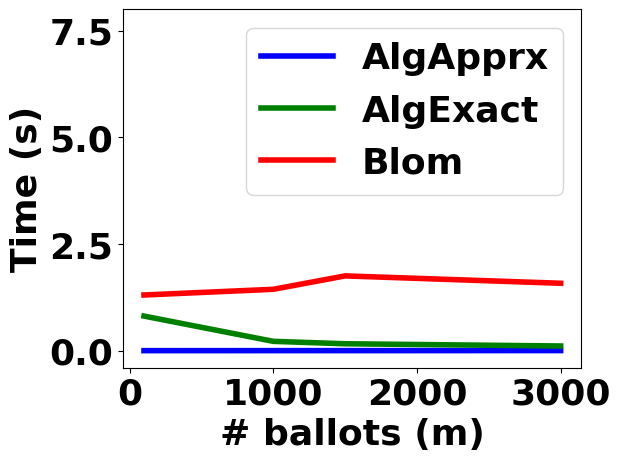

In [11]:
#import matplotlib.pyplot as plt
#plt.rcParams.update({'font.size': 18})
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.tight_layout()


x  = avgDf['Number_of_voters'].to_list()
y = avgDf['heuristicV1_runtime'].to_list()
z = avgDf['Our_runtime'].to_list()
u = avgDf['Blom_runtime'].to_list()


plt.plot(x,y,color=hColor,linewidth=4)
plt.plot(x,z,color=oColor,linewidth=4)
plt.plot(x,u,color=bColor,linewidth=4)
plt.tight_layout()
# create an index for each tick position

plt.ylabel('Time (s)')
plt.xlabel('# ballots (m)')
#plt.xticks([4,6,8,10,12], ['4','6','8','10','12'])
plt.ylim(-8*5/100,8)

plt.legend(["AlgApprx","AlgExact","Blom"],loc='upper right')
fig.savefig(r"Figures/substitution_book_n=8_vary_m_runtime.pdf",dpi=2024,bbox_inches='tight')